# Grouping and reshaping dataframes

Relevant pages with more examples in the pandas user guide/tutorial:
- [Grouping](https://pandas.pydata.org/docs/user_guide/10min.html#grouping) - 10 minutes to pandas
- [Reshaping: stack and pivot tables](https://pandas.pydata.org/docs/user_guide/10min.html#reshaping) - 10 minutes to pandas
- [Reshaping and pivot tables](https://pandas.pydata.org/docs/user_guide/reshaping.html) - pandas user guide
- [Group by: split-apply-combine](https://pandas.pydata.org/docs/user_guide/groupby.html) - pandas user guide

Relevant pages in the pandas documentation:
- [Documentation for the *method* `.groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) (the function to create the `GroupBy` objects)
- [Documentation for the `GroupBy` *object*](https://pandas.pydata.org/docs/reference/groupby.html) (all the attributes and methods you can use on `GroupBy` objects to recreate new dataframes/series)
- [Documentation for the method `.pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html)
- [Documentation for the method `.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.melt.html)
- [Documentation for the method `.explode()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html)

In the reading list:
- [Chapter 3: Data manipulation with Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html) - Jake VanderPlas, *The Python Data Science Handbook* \
In this chapter:
    - [Aggregation and grouping: Split-apply-combine](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html#GroupBy:-Split,-Apply,-Combine)
    - [Pivot tables](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html)

In [1]:
import pandas as pd

contestants = {'name': ['Mariam', 'Hashim', 'Ayesha', 'Ronan', 'Louisa', 'Benjamin'],
               'age': [51, 32, 33, 46, 29, 44],
               'city': ['Glasgow', 'Glasgow', 'Glasgow', 'Edinburgh', 'Edinburgh', 'Edinburgh'],
               'team': ['red', 'red', 'blue', 'red', 'blue', 'blue'],
               'scores': [(3, 4, 6), (7, 10, 4), (6, 7, 6), (9, 8, 8), (9, 6, 3), (9, 1, 1)]}

df = pd.DataFrame(contestants)
df

,name,age,city,team,scores
0,Mariam,51,Glasgow,red,"(3, 4, 6)"
1,Hashim,32,Glasgow,red,"(7, 10, 4)"
2,Ayesha,33,Glasgow,blue,"(6, 7, 6)"
3,Ronan,46,Edinburgh,red,"(9, 8, 8)"
4,Louisa,29,Edinburgh,blue,"(9, 6, 3)"
5,Benjamin,44,Edinburgh,blue,"(9, 1, 1)"


In [10]:
# Who's winning?
final_scores = [sum(scores) for scores in df['scores']]
winner_index = final_scores.index(max(final_scores))
df.loc[winner_index, 'name']

'Ronan'

In [26]:
# Who's winning (team)?
team_scores = df.groupby('team')['scores'].sum()
final_scores = {team: sum(scores) for team, scores in dict(team_scores).items()}
final_scores

{'blue': 48, 'red': 59}

In [34]:
# Who's winning (team)?
df = df.explode('scores')
df.groupby('team')['scores'].sum()

team
blue    48
red     59
Name: scores, dtype: int64

In [67]:
# Who's winning (individual)?
# df.groupby('name')['scores'].mean()
df['scores'] = pd.to_numeric(df['scores'])
df['scores']

0     3
0     4
0     6
1     7
1    10
1     4
2     6
2     7
2     6
3     9
3     8
3     8
4     9
4     6
4     3
5     9
5     1
5     1
Name: scores, dtype: int64

In [72]:
df.groupby('name')['scores'].mean().sort_values(ascending=False)

name
Ronan       8.333333
Hashim      7.000000
Ayesha      6.333333
Louisa      6.000000
Mariam      4.333333
Benjamin    3.666667
Name: scores, dtype: float64

In [84]:
df.groupby('name').get_group('Ronan')

,name,age,city,team,scores
3,Ronan,46,Edinburgh,red,9
3,Ronan,46,Edinburgh,red,8
3,Ronan,46,Edinburgh,red,8


In [90]:
df.groupby(10 * (df['age'] // 10))['scores'].mean()

age
20    6.000000
30    6.666667
40    6.000000
50    4.333333
Name: scores, dtype: float64

In [91]:
df

,name,age,city,team,scores
0,Mariam,51,Glasgow,red,3
0,Mariam,51,Glasgow,red,4
0,Mariam,51,Glasgow,red,6
1,Hashim,32,Glasgow,red,7
1,Hashim,32,Glasgow,red,10
1,Hashim,32,Glasgow,red,4
2,Ayesha,33,Glasgow,blue,6
2,Ayesha,33,Glasgow,blue,7
2,Ayesha,33,Glasgow,blue,6
3,Ronan,46,Edinburgh,red,9


In [97]:
df.pivot_table(index='name', aggfunc={'age': pd.unique, 'city': pd.unique, 'team': pd.unique, 'scores': pd.Series.mean})

,age,city,scores,team
name,,,,
Ayesha,33,Glasgow,6.333333,blue
Benjamin,44,Edinburgh,3.666667,blue
Hashim,32,Glasgow,7.000000,red
Louisa,29,Edinburgh,6.000000,blue
Mariam,51,Glasgow,4.333333,red
Ronan,46,Edinburgh,8.333333,red


In [100]:
df.pivot_table(index='team', columns='city', values='scores', aggfunc=pd.Series.mean)

city,Edinburgh,Glasgow
team,,
blue,4.833333,6.333333
red,8.333333,5.666667


In [105]:
all_scores = [(3, 4, 6), (7, 10, 4), (6, 7, 6), (9, 8, 8), (9, 6, 3), (9, 1, 1)]
scores_per_column = [[score[i] for score in all_scores] for i in range(3)]

contestants = {'name': ['Mariam', 'Hashim', 'Ayesha', 'Ronan', 'Louisa', 'Benjamin'],
               'age': [51, 32, 33, 46, 29, 44],
               'city': ['Glasgow', 'Glasgow', 'Glasgow', 'Edinburgh', 'Edinburgh', 'Edinburgh'],
               'team': ['red', 'red', 'blue', 'red', 'blue', 'blue'],
               'score_1': scores_per_column[0],
               'score_2': scores_per_column[1],
               'score_3': scores_per_column[2]}

df = pd.DataFrame(contestants)
df

,name,age,city,team,score_1,score_2,score_3
0,Mariam,51,Glasgow,red,3,4,6
1,Hashim,32,Glasgow,red,7,10,4
2,Ayesha,33,Glasgow,blue,6,7,6
3,Ronan,46,Edinburgh,red,9,8,8
4,Louisa,29,Edinburgh,blue,9,6,3
5,Benjamin,44,Edinburgh,blue,9,1,1


In [115]:
# df = df.melt(id_vars=['name', 'age', 'city', 'team'], 
#              value_vars=['score_1', 'score_2', 'score_3'],
#              var_name='game',
#              value_name='score')
df

,name,age,city,team,game,score
0,Mariam,51,Glasgow,red,score_1,3
1,Hashim,32,Glasgow,red,score_1,7
2,Ayesha,33,Glasgow,blue,score_1,6
3,Ronan,46,Edinburgh,red,score_1,9
4,Louisa,29,Edinburgh,blue,score_1,9
5,Benjamin,44,Edinburgh,blue,score_1,9
6,Mariam,51,Glasgow,red,score_2,4
7,Hashim,32,Glasgow,red,score_2,10
8,Ayesha,33,Glasgow,blue,score_2,7
9,Ronan,46,Edinburgh,red,score_2,8


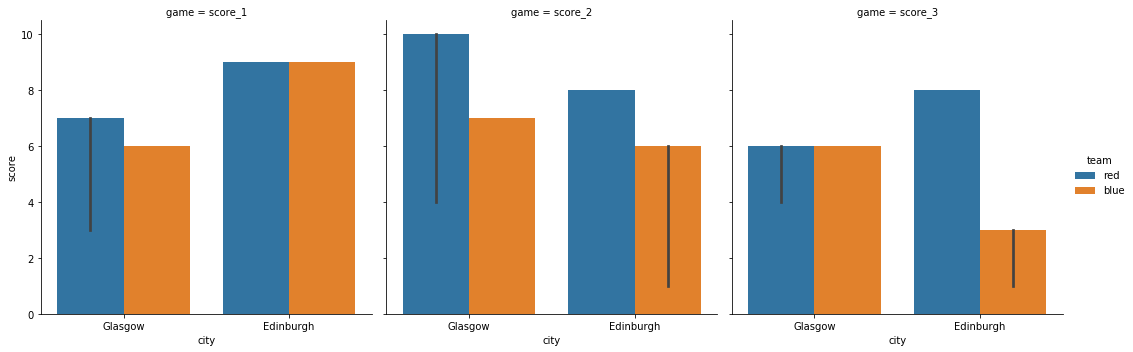

In [121]:
import seaborn as sns

g = sns.catplot(data=df,
                kind='bar',
                x='city',
                y='score',
                hue='team',
                col='game',
                estimator=max)